# Imports

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.spatial.distance import euclidean
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load CSV + Scaling (jump to hardcoded vectors)

In [22]:
# Create a Pandas dataframe from a Zeek log

'''
df= pd.read_csv('/content/drive/MyDrive/Universita/Magistrale/Tesi/ZeekML/Logs/cross_corr.csv')


filter_df=df[['S7','Modbus']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

filter_df = scaler.fit_transform(filter_df)

print(filter_df)

s1 = filter_df[:,0]

s2 = filter_df[:,1]

'''

s1 = np.array([13, 29, 27, 30, 12, 17, 13, 15, 19, 25, 69, 27, 13,
               23,12,17,15,18,6,28,88,16,23,16,15,46,16,27
               ,18,20,6])

s2 = np.array([312,18,325,12,13,10,9,10,15,24,23,
               180,8,11,96,16,13,15,3,31,7,12,15,
               11,15,73,59,13,9,17,38,72])



#s2 = filter_df['Modbus'].to_list()


##Granger Casuality Test

In [6]:
#ax = sns.lineplot(x="timestamp", y="S7", data=df)
#ax1 = sns.lineplot(x="timestamp", y='Modbus', data=df)

#res = grangercausalitytests(df[['S7', 'Modbus']], maxlag=9)


TypeError: ignored

#Dynamic Time Warping (saved to warp.png)

In [23]:

!pip install dtaidistance
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
import random


from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis



path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")





(None, None)

##Warping paths

[86194. 82546. 81611.]
2


/usr/local/lib/python3.7/dist-packages/dtaidistance/dtw.py:428: RuntimeWarning: invalid value encountered in sqrt
  dtw = np.sqrt(dtw)


(<Figure size 720x720 with 4 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f57328abe50>])

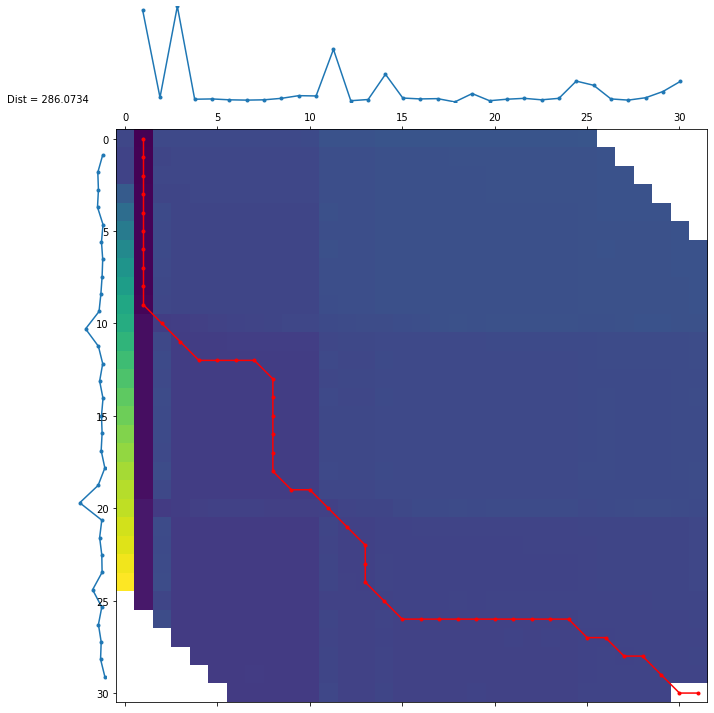

In [24]:
distance, paths = dtw.warping_paths(s1, s2)

random.seed(1)
for idx in range(len(s2)):
    if random.random() < 0.05:
        s2[idx] += (random.random() - 0.5) / 2
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)

s1=np.array(s1)
s2=np.array(s2)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)